In [24]:
import os
import pandas as pd
import numpy as np
import gseapy as gp 
from gseapy.plot import barplot, dotplot 
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# 手动加载基因集文件
def load_gmt(file_path):
    gene_sets = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split('\t')
            gene_set_name = parts[0]
            genes = parts[2:]
            gene_sets[gene_set_name] = genes
    return gene_sets

In [26]:
# 设置文件夹路径
folder_path = './output/output_marker/endothelail'
# 获取文件夹中的所有文件名
file_names = os.listdir(folder_path)

In [27]:
kegg_file = "/data/hanxue/BCY_ATAC/KEGG/c2.cp.kegg_medicus.v2024.1.Hs.symbols.gmt"
kegg_geneset = load_gmt(kegg_file)

In [41]:
# 存储每个文件的富集结果
enrichment_results = []

# 遍历每个文件并进行富集分析
for file_name in file_names:
    # 构造文件路径
    file_path = os.path.join(folder_path, file_name)
    
    # 读取基因列表（除第一行为表头外，每行一个基因）
    gene_list = pd.read_csv(file_path, header=0)['Gene'].tolist()
    
    # 进行KEGG富集分析
    enr = gp.enrichr(gene_list=gene_list,
                  gene_sets=kegg_geneset,  # 设置数据
                  organism='Human',  # 设置物种
                  outdir=None,  # 禁用输出目录
                  cutoff=0.05)
    
    # 检查是否有富集结果
    if len(enr.results) == 0:
        print(f"No enrichment results for {file_name}. Skipping...")
        continue  # 跳过当前文件
    
    # 获取显著富集的通路
    significant_terms = enr.results[enr.results['Adjusted P-value'] < 0.1]
    
    # 为每个通路添加细胞类型标签
    significant_terms['Sample'] = file_name.split('.')[0]  # 文件名是细胞类型名
    
    # 将结果添加到汇总列表
    enrichment_results.append(significant_terms)

# 合并所有结果
if enrichment_results:
    all_results_kegg = pd.concat(enrichment_results, ignore_index=True)
else:
    print("No enrichment results found for any file.")
    all_results_kegg = pd.DataFrame()  # 创建一个空的DataFrame

/tmp/ipykernel_1106683/1171431897.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_terms['Sample'] = file_name.split('.')[0]  # 文件名是细胞类型名


In [42]:
if 'Adjusted P-value' in all_results_kegg.columns:
    # 计算 -log10(Adjusted P-value)
    all_results_kegg['-log10(Adjusted P-value)'] = -np.log10(all_results_kegg['Adjusted P-value'])
else:
    raise KeyError("Column 'Adjusted P-value' not found in the DataFrame.")

In [43]:
all_results_kegg

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Sample,-log10(Adjusted P-value)
0,gs_ind_0,KEGG_MEDICUS_PATHOGEN_HCMV_UL33_TO_GNAI_AC_PKA...,1/26,0.054714,0.082926,29.491979,85.693154,ADCY2,after_neoadjuvant,1.081308
1,gs_ind_0,KEGG_MEDICUS_REFERENCE_ACTH_CORTISOL_SIGNALING...,1/32,0.066979,0.082926,23.822511,64.401267,ADCY2,after_neoadjuvant,1.081308
2,gs_ind_0,KEGG_MEDICUS_REFERENCE_ADRB3_UCP1_SIGNALING_PA...,1/35,0.073062,0.086345,21.727273,56.848395,ADCY2,after_neoadjuvant,1.063761
3,gs_ind_0,KEGG_MEDICUS_REFERENCE_AMH_SIGNALING_PATHWAY,1/9,0.019230,0.082926,89.021390,351.747869,BMPR1B,after_neoadjuvant,1.081308
4,gs_ind_0,KEGG_MEDICUS_REFERENCE_BMP15_SIGNALING_PATHWAY,1/7,0.014984,0.082926,116.496503,489.377800,BMPR1B,after_neoadjuvant,1.081308
5,gs_ind_0,KEGG_MEDICUS_REFERENCE_BMP_SIGNALING_PATHWAY,1/20,0.042314,0.082926,38.650350,122.236743,BMPR1B,after_neoadjuvant,1.081308
6,gs_ind_0,KEGG_MEDICUS_REFERENCE_CRHR_PKA_ACTH_SIGNALING...,1/27,0.056767,0.082926,28.368782,81.384318,ADCY2,after_neoadjuvant,1.081308
7,gs_ind_0,KEGG_MEDICUS_REFERENCE_CX3CR1_GNAI_AC_PKA_SIGN...,1/17,0.036064,0.082926,45.727273,151.926996,ADCY2,after_neoadjuvant,1.081308
8,gs_ind_0,KEGG_MEDICUS_REFERENCE_EP_NE_ADRB_CAMP_SIGNALI...,1/15,0.031878,0.082926,52.072100,179.431557,ADCY2,after_neoadjuvant,1.081308
9,gs_ind_0,KEGG_MEDICUS_REFERENCE_FSHR_GNAS_PKA_SIGNALING...,1/16,0.033973,0.082926,48.695015,164.695655,ADCY2,after_neoadjuvant,1.081308


In [44]:
# 为治疗前的数据添加负值
all_results_kegg['x_value'] = all_results_kegg.apply(
    lambda row: -row['-log10(Adjusted P-value)'] if row['Sample'] == 'without_neoadjuvant' 
    else row['-log10(Adjusted P-value)'], axis=1
)

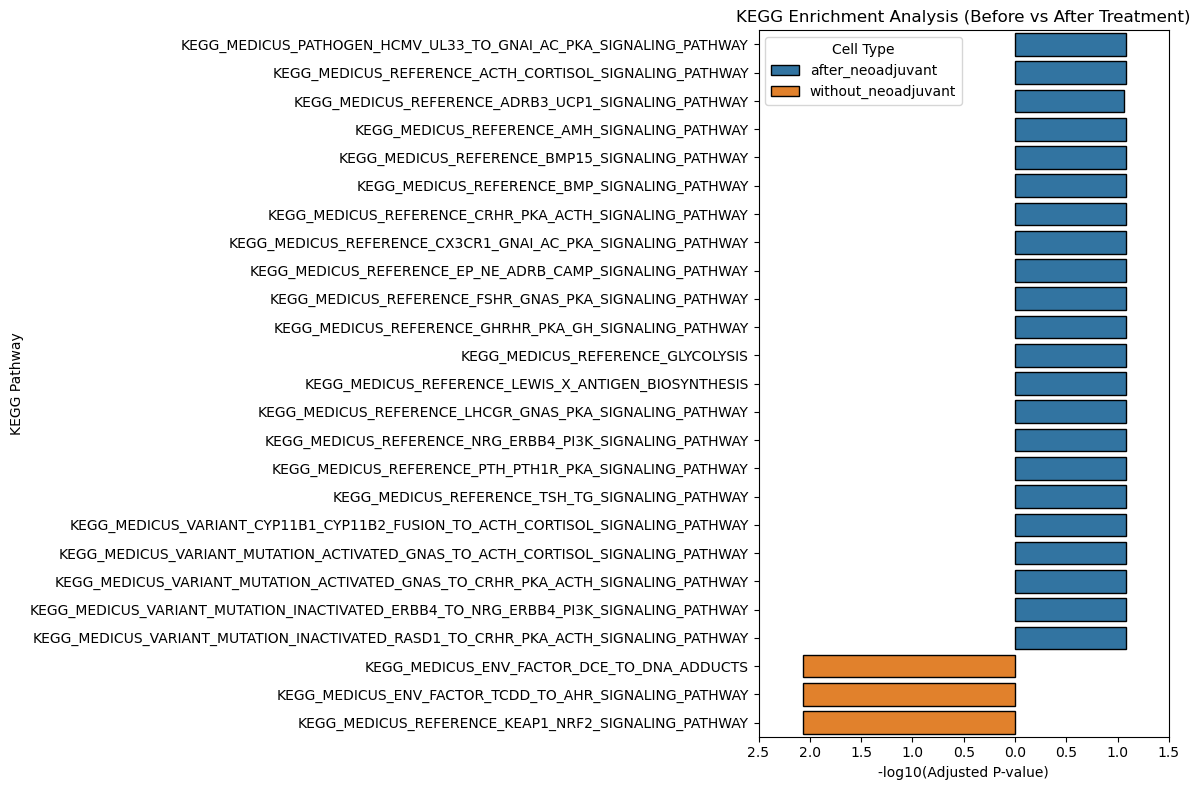

In [46]:
# 设置绘图
plt.figure(figsize=(12, 8))

# 使用 seaborn 绘制条形图
sns.barplot(
    x='x_value', 
    y='Term', 
    hue='Sample',  # 使用什么条目进行颜色区分
    data=all_results_kegg, 
    edgecolor = 'black',
    # dodge=True  # 确保不同 Cell_Type 的条形分开
)

# 调整 x 轴刻度标签为正值
plt.xticks(ticks=plt.xticks()[0], labels=[abs(x) for x in plt.xticks()[0]])

plt.yticks(fontsize = 10)

# 添加标题和标签
plt.title('KEGG Enrichment Analysis (Before vs After Treatment)')
plt.xlabel('-log10(Adjusted P-value)')
plt.ylabel('KEGG Pathway')

# 添加图例
plt.legend(title='Cell Type')

# 显示图表
plt.tight_layout()
# 保存图形
plt.savefig('enrichment_kegg1.svg', format = "svg")
